In [14]:
import numpy as np
import cvxopt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import matplotlib.cm as cmx
import matplotlib.colors as colors

In [15]:
del_t = 0.1
v_init = 5
w_init = 0.2
a_max = 10
alpha_min = -0.5
alpha_max = 0.5

class agent:
    def __init__(self,rad,start,goal,theta,vmax,wmax):
        self.rad = rad
        self.xpath = []
        self.ypath = []
        self.vplot = []
        self.wplot = []
        self.time = 0
        self.goal = goal
        self.theta = theta
        self.v = v_init
        self.w = w_init
        self.pos = start
        self.vmax = vmax
        self.wmax = wmax
        
    def __str__(self):
        return (str(self.time)+" "+str(self.theta)+" "+str(self.v)+" "+str(self.w)+" "+str(self.pos))    
            

    def opt_traj(self):
        self.visualize_traj()
        print ("start v: ",self.v,"start w: ",self.w)
        while (np.linalg.norm(self.pos-self.goal)>0.5):
            x_new = self.pos[0] + self.v*del_t*np.cos(self.theta+self.w*del_t)
            y_new = self.pos[1] + self.v*del_t*np.sin(self.theta+self.w*del_t)
            self.theta += self.w*del_t
            self.xpath.append(x_new)
            self.ypath.append(y_new)
            self.pos = [x_new,y_new]
            theta_new = self.theta
            v_new = self.v 
            w_new = self.w
            xgi = self.pos[0]
            ygi = self.pos[1]
            while (np.linalg.norm(np.array([v_new,w_new]))>0.5):
                # vi = self.v, wi = self.w
                theta_new += self.w*del_t
                xgi += (self.v*del_t*np.cos(theta_new) - self.goal[0])
                ygi += (self.v*del_t*np.sin(theta_new) - self.goal[1])
                p_mat = 2*np.array([[del_t**2,0],
                                  [0,(self.v**2)*(del_t**4)]])
                P = cvxopt.matrix(p_mat,tc='d')
                q_mat = np.array([2*del_t*(xgi*np.cos(theta_new)+ygi*np.sin(theta_new)),
                                 -2*del_t**2*self.v*(xgi*np.sin(theta_new)-ygi*np.cos(theta_new))])
                Q = cvxopt.matrix(q_mat,tc='d')
                g_mat = np.array([[1,0],[0,1],[0,-1],[-1,0],[1,0]])
                h = cvxopt.matrix(np.array([a_max*del_t,alpha_max*del_t,-del_t*alpha_max,0,self.vmax-self.v]),tc='d')
                g = cvxopt.matrix(g_mat,tc='d')
                sol = cvxopt.solvers.qp(P,Q,g,h,options={'show_progress': False})
                v_new = sol['x'][0] #vd
                w_new = sol['x'][1] #wd
#                 print (v_new,w_new)
                self.v += v_new #vd+vi
                self.w += w_new #wd+wi
            print ("##########End of Optimization#############")
            print ("new v: ",self.v,"new w: ",self.w)
            print ("Opti complete")
#             self.vplot.append(self.v)
#             self.wplot.append(self.w)
            print (self)
            self.time+=1
            self.visualize_traj()

             
    def visualize_traj(self):
        figure = plt.figure()
#         print (self.pos)
        print ("I wanna rotate by: ",self.theta)
        ax = figure.add_subplot(1,1,1)
        robot = matplotlib.patches.Rectangle(
            (self.pos[0]-self.rad*np.sqrt(2)*np.cos(self.theta+np.pi/4),self.pos[1]-self.rad*np.sqrt(2)*np.sin(self.theta+np.pi/4)),
            height = self.rad*2,
            width = self.rad*2,
            angle = self.theta*180/np.pi,
            edgecolor='black',
            linewidth=1.0,
            animated=True,
            alpha=1,
            zorder=2)
        ax.add_patch(robot)
        name = 'data/snap%s.png'%str(self.time)
        ax.plot([self.goal[0]], [self.goal[1]], '*', color="red", markersize =15,linewidth=3.0)
        ax.plot(self.xpath,self.ypath,'b-')
        ax.set_aspect('equal')
        ax.set_xlim(-10.0, 100.0)
        ax.set_ylim(-10.0, 100.0)
        ax.set_xlabel(r'$x (m)$')
        ax.set_ylabel(r'$y (m)$')
        ax.grid(True)
        plt.savefig(name, dpi = 200)
        plt.cla()
        plt.close(figure)
        return figure
    


In [16]:
bot = agent(2,np.array([0,0]),np.array([50,50]),np.pi/4,20,0.5)
bot.opt_traj()

I wanna rotate by:  0.7853981633974483
start v:  5 start w:  0.2
##########End of Optimization#############
new v:  19.999999998916444 new w:  0.9999995647215916
Opti complete
0 0.8053981633974483 19.999999998916444 0.9999995647215916 [0.3464120858553736, 0.36055327868891895]
I wanna rotate by:  0.8053981633974483
##########End of Optimization#############
new v:  20.000000005555144 new w:  1.049999561925885
Opti complete
1 0.9053981198696075 20.000000005555144 1.049999561925885 [1.5811569648087196, 1.9338952896531798]
I wanna rotate by:  0.9053981198696075
##########End of Optimization#############
new v:  20.000000007756434 new w:  1.0999995551536188
Opti complete
2 1.010398076062196 20.000000007756434 1.0999995551536188 [2.644204116617341, 3.6279822871989476]
I wanna rotate by:  1.010398076062196
##########End of Optimization#############
new v:  20.000000004215096 new w:  1.1499995539827568
Opti complete
3 1.120398031577558 20.000000004215096 1.1499995539827568 [3.5148524037046283,

##########End of Optimization#############
new v:  20.000000002382908 new w:  2.6499995599131956
Opti complete
33 6.745396669990815 20.000000002382908 2.6499995599131956 [-5.063576428874063, 8.02490748330321]
I wanna rotate by:  6.745396669990815
##########End of Optimization#############
new v:  20.000000006508206 new w:  2.6999995541341724
Opti complete
34 7.010396625982135 20.000000006508206 2.6999995541341724 [-3.5695140502284337, 9.354485465096278]
I wanna rotate by:  7.010396625982135
##########End of Optimization#############
new v:  20.00000000313639 new w:  2.749999551458923
Opti complete
35 7.280396581395552 20.00000000313639 2.749999551458923 [-2.484220382482246, 11.034407385113191]
I wanna rotate by:  7.280396581395552
##########End of Optimization#############
new v:  20.00000000099055 new w:  2.7999995497903933
Opti complete
36 7.555396536541444 20.00000000099055 2.7999995497903933 [-1.8958839758832027, 12.945914715448254]
I wanna rotate by:  7.555396536541444
##########E

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

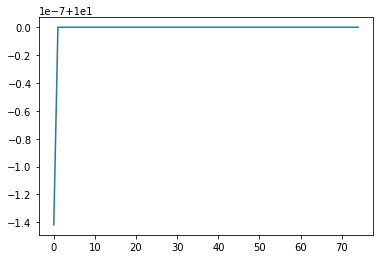

In [16]:
plt.plot(bot.vplot)

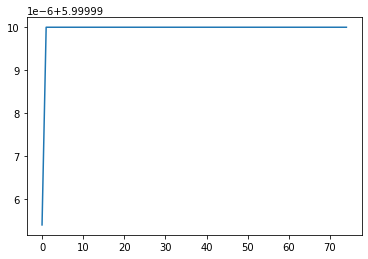

In [17]:
plt.plot(bot.wplot)